## This notebook is used to evaluate the trained models

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
font = {'family' : 'Arial',
        'size'   : 9}
plt.rc('font', **font)
plt.rcParams['mathtext.fontset'] = 'stix'#'dejavuserif'

def to_grayscale(fig):
    fig.canvas.draw()
    img = np.array(fig.canvas.renderer.buffer_rgba())
    grayscale_img = np.dot(img[..., :3], [0.2989, 0.5870, 0.1140])
    fig_gray, ax_gray = plt.subplots(figsize=(fig.get_size_inches()), dpi=fig.dpi)
    ax_gray.imshow(grayscale_img, cmap=plt.get_cmap('gray'), vmin=0, vmax=255)
    ax_gray.axis('off')  # Turn off the axis
    ax_gray.set_title('Grayscale plot')

path_output = '../Data/OutputData/trained_models/highD_LC/'
fig_path = r'C:/SURFdrive/PhD progress/PhDResearch/4_Conflict/AMAR/Figures/'

manualSeed = 131
np.random.seed(manualSeed)

### Plotting training progress

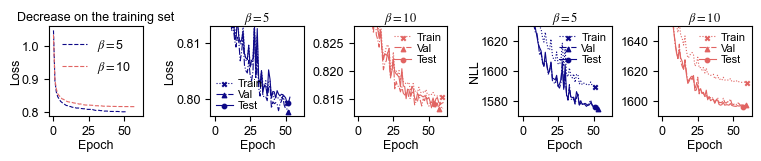

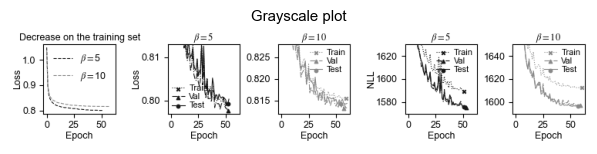

In [5]:
fig, axes = plt.subplots(1,7,figsize=(7.5,1.5),sharex=True,constrained_layout=True,gridspec_kw={'width_ratios': [1,0.05,1,1,0.05,1,1]})
cmap = mpl.cm.plasma
for ax in [axes[1],axes[4]]:
    ax.axis('off')

num_batch = 271 # 271 batches per epoch
axes[0].set_title('Decrease on the training set', fontsize=9, pad=4)
# axes[0].set_xlabel('Per '+str(num_batch)+' batches', fontsize=9, labelpad=1)
axes[0].set_xlabel('Epoch', fontsize=9, labelpad=1)
axes[0].set_ylabel('Loss', fontsize=9, labelpad=0)
for idx_col, beta, color in zip(range(2),['5','10'],[cmap(0.),cmap(0.6)]):
    loss_records = pd.read_csv(path_output+f'beta={beta}/loss_records.csv').values.reshape(-1)
    loss_records = loss_records[loss_records>0][271:]
    loss_records = loss_records[:num_batch*(len(loss_records)//num_batch)].reshape(-1,num_batch)
    loss = loss_records.mean(axis=1)
    axes[0].plot(loss, color=color, label=r'$\beta=$'+beta, lw=0.8, ls='--')
axes[0].legend(frameon=False, loc='upper right')

minimals = []
axes[2].set_ylabel('Loss', fontsize=9, labelpad=0)
axes[2].set_ylim(0.797,0.813)
axes[3].set_ylim(0.812,0.828)
axes[5].set_ylabel('NLL', fontsize=9, labelpad=0)
axes[5].set_ylim(1570, 1630)
axes[6].set_ylim(1590, 1650)
for axid in [2,5]:
    axes[axid].set_title(r'$\beta=5$', fontsize=9, pad=3)
    axes[axid].set_xticks([0,20,40,60])
    axes[axid+1].set_title(r'$\beta=10$', fontsize=9, pad=3)
    axes[axid+1].set_xticks([0,20,40,60])
for axid, beta, color in zip([2,3],['5','10'],[cmap(0.),cmap(0.6)]):
    evaluation = pd.read_csv(path_output+f'beta={beta}/evaluation.csv')
    # evaluation = evaluation.iloc[1:]
    for plus, metric in zip([0, 3],['_loss', '_nll']):
        for dataset, ls, marker in zip(['train','val','test'], [':', '-.', '-'], ['x', '^', 'o']):
            axes[axid+plus].plot(evaluation['epoch'], evaluation[dataset+metric], label=dataset, color=color, lw=0.8, ls=ls)
            minimal = evaluation.loc[evaluation[dataset+metric].sort_values().index[:1]].copy()
            minimal['dataset'] = dataset
            minimal['beta'] = beta
            minimals.append(minimal[['dataset','beta','epoch','train_loss','val_loss','test_loss','train_nll','val_nll','test_nll']])
            if marker=='x':
                axes[axid+plus].scatter(minimal['epoch'], minimal[dataset+metric], marker=marker,
                                        color=color, s=10, label=dataset)
            else:
                axes[axid+plus].scatter(minimal['epoch'], minimal[dataset+metric], marker=marker,
                                        color=color, s=10, label=dataset)

for ax, loc in zip(axes[[2,3,5,6]],['lower left','upper right','upper right','upper right']):
    ax.set_xlabel('Epoch', fontsize=9, labelpad=1)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend([(handles[0], handles[1]), (handles[2], handles[3]), (handles[4], handles[5])],
              ['Train', 'Val', 'Test'], ncol=1,
              loc=loc, frameon=False, handletextpad=0.5, fontsize=8, borderaxespad=0.1, labelspacing=0.1, handlelength=1.5, handleheight=0.5)
minimals = pd.concat(minimals).reset_index(drop=True)

for ax in [axes[2],axes[3],axes[5],axes[6]]:
    ax.set_xticks([0,25,50])

to_grayscale(fig)

In [6]:
fig.savefig(fig_path+'model_evaluation.pdf', bbox_inches='tight', dpi=600)

### Model selection

In [59]:
minimals[(minimals['dataset']=='test')].drop_duplicates()
# select beta==5 and epoch==52

,dataset,beta,epoch,train_loss,val_loss,test_loss,train_nll,val_nll,test_nll
2,test,5,52,0.799456,0.797730,0.799307,1589.683042,1575.662449,1575.715588
5,test,5,51,0.799320,0.798229,0.799336,1589.447594,1575.252777,1575.690396
8,test,10,54,0.815708,0.814256,0.814192,1612.843029,1598.282718,1596.555503
11,test,10,57,0.815503,0.813242,0.814398,1612.447561,1597.162761,1596.180497
